<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/Geron_ch10_Intro_to_ANN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**The Perceptron**
Implement a single-TLU (*threshold logic unit*) network

In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [0]:
iris = load_iris()
print(type(iris.data))
print(iris.data.shape)
print(type(iris.target))
print(iris.target.shape)
print(iris.target)

<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) #Iris setosa?

In [0]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = per_clf.predict([[2, 0.5]])

  ## --

## **Implementing MLPs with Keras**

### **Installing TensorFlow 2**

In [7]:
#!pip install --upgrade tensorflow
#!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 35kB/s 
     |████████████████████████████████| 450kB 53.5MB/s 
     |████████████████████████████████| 3.8MB 47.3MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalle

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


Another way to install TensorFlow :

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [6]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

1.15.0


### **Building an Image Classifier Using the Sequential API**

* #### Using Keras to load the dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [0]:
# The dataset is already split into a training set and test set, but there's no validation set, so we'll create one now.
# Additionally, since we're going to train the NN using Gradient Descent, we must scale the input features.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
# We need a list of class names to know what we are dealing with:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]]

'Coat'

* #### Getting the model using the Sequential API

In [0]:
# Build a classification MLP with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
# Instead of adding athe layers one by one as we just did, we can pass a list of layers when creating the Sequential model
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Get the model's list of layers
model.layers

In [0]:
# fetch a layer by its index
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [0]:
# fetch a layer by its name
model.get_layer('dense_3') is hidden1

True

In [0]:
# All the parameters of a layer can be accessed using its "get_weight()" and "set_weight()" methods
weights, biases = hidden1.get_weights()
#print(weights)
print(weights.shape)
#print(biases)
print(biases.shape)

# Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry), 
# and the biases were initialized to 0s)

(784, 300)
(300,)


* #### Compiling the model
After a model is created, we must call its `compile()` methos to specify the loss funcion and the optimizer to use.

* `sparse_categorical_crossentropy` loss for sparse labels (e.g. 0, 1, ..., 9)

* `categorical_crossentropy` loss if one target probability per class (such as one-hot vector)

* `binary_crossentropy` loss for binary classification

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* #### Traiing and evaluating the model
Now the model is ready to be trained. For this we simply need to call its `fit()` method

In [0]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 162us/sample - loss: 0.7267 - accuracy: 0.7634 - val_loss: 0.5525 - val_accuracy: 0.8104
Epoch 2/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.4899 - accuracy: 0.8302 - val_loss: 0.4762 - val_accuracy: 0.8330
Epoch 3/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.4450 - accuracy: 0.8429 - val_loss: 0.4226 - val_accuracy: 0.8564
Epoch 4/30
55000/55000 [==============================] - 7s 125us/sample - loss: 0.4172 - accuracy: 0.8531 - val_loss: 0.3958 - val_accuracy: 0.8616
Epoch 5/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3964 - accuracy: 0.8604 - val_loss: 0.3817 - val_accuracy: 0.8668
Epoch 6/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3791 - accuracy: 0.8658 - val_loss: 0.3972 - val_accuracy: 0.8642
Epoch 7/30
55000/55000 [===========================

In [0]:
print(history.params)  # The training parameters
print(history.epoch)   # The list of epochs it went through
print(history.history) # A dictionary containing the loss and extra metrics it measured at the end of each epoch on the training set 
                      # and the validation set

{'batch_size': 32, 'epochs': 30, 'steps': 1719, 'samples': 55000, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.7266931029536507, 0.48989510472471065, 0.4450046572555195, 0.41723152974735606, 0.3964259020805359, 0.3790959351669658, 0.36633945042653515, 0.35526355828371914, 0.34355224726850336, 0.33448938221714714, 0.32538537524613464, 0.31809633984132246, 0.31062045509598474, 0.30371643628423867, 0.29643021681308745, 0.2911188094139099, 0.285340710735321, 0.27882462786652823, 0.27530007649768484, 0.2693279897364703, 0.2658248386160894, 0.2599608641321009, 0.25542428789680655, 0.25123820665749635, 0.24760989378907464, 0.2429476567138325, 0.239574140968106, 0.23375835678794168, 0.23170318324024028, 0.227088318956982], 'accuracy': [0.76336366, 0.8302, 0.8428909, 0.8531455, 0.86038184, 0.8658, 0.86985457, 0.87365454, 

(0, 1)

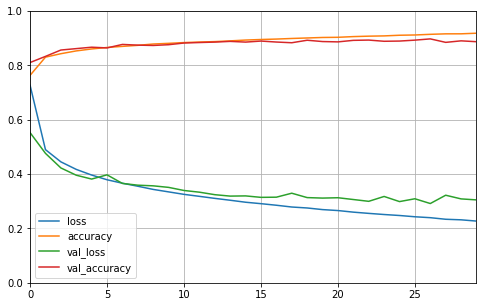

In [0]:
# Create a pandas DataFrame of history.history and plot it
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0 - 1]


If the validation loss is still going down, we should probably continue training. we can simply call `fit()` mothod again, since Keras just continues training where it left off.

If we are not satisfied with the performance of our model, we should go back and tune the hyperparameters. the first one to check is the learning rate. ...

Once we are satisfied with our model's validation accuracy, we should evaluate it on the test set to estimate the generalization error before we deploy the model to production.

In [0]:
model.evaluate(X_test, y_test)

* #### Using the model to make predictions
Next, We can use the model's `predict()` method to make predictions on new instances. (Since we don;t have actual new instances, we will just use the first three instances of the test case.

In [0]:
X_new = X_test[:3]
# For each instance, the model estimates one probability per class, from class 0 to class 9
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# If we only care about the class with the highest estimated probability, then we can use the `predict_classes()` method instead.
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [0]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## --



### **Building a Regression MLP Using the Sequential API**

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
housing = fetch_california_housing()
type(housing)

sklearn.utils.Bunch

In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
print(X_train.shape)

(11610, 8)


In [0]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)                                                                 
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 94us/sample - loss: 2.5064 - val_loss: 0.5205
Epoch 2/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4579 - val_loss: 0.6513
Epoch 3/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4171 - val_loss: 0.4032
Epoch 4/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3916 - val_loss: 0.3996
Epoch 5/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3833 - val_loss: 0.3903
Epoch 6/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3761 - val_loss: 0.3833
Epoch 7/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3737 - val_loss: 0.4026
Epoch 8/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3851 - val_loss: 0.3825
Epoch 9/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3652 - val_l

### **Buiding Complex Models Using the Functional API**
One example of a nonsequential neural network is a *Wide and Deep* neural network. It connects all or part of the inputs directly to the output layers.

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

But if we want to send a subset of the features through the wide path and a different subset through the deep path? e.g. suppose we want to send 5 features through the wide path and 6 features through the deep path:


In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="Deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

When we call the `fit()` method then, we must pass a pair of matrics (X_train_A, X_train_B): one per input. Also for X_valid and X_test when we call `evaluate()` or `predict()`

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [16]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pres = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 119us/sample - loss: 2.1855 - val_loss: 1.1054
Epoch 2/20
11610/11610 [==============================] - 1s 72us/sample - loss: 1.0148 - val_loss: 0.8290
Epoch 3/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.8041 - val_loss: 0.7106
Epoch 4/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.7058 - val_loss: 0.6453
Epoch 5/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6471 - val_loss: 0.6004
Epoch 6/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6066 - val_loss: 0.5715
Epoch 7/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5782 - val_loss: 0.5476
Epoch 8/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5570 - val_loss: 0.5329
Epoch 9/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5414 - val_

We can handle multiple outputs, below example is to add an auxiliary output for regularization. We add auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its ownm without relying on the rest of the network.

In [0]:
# The shallow layers layers are the same as above, up to the main output layer
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each outputs will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (If we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute  all these losses and simply add them up to get the final loss used for training. We want to guve the main output's loss a much greater weight. 

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

When we train the model, we need to provide labels for each output.

In [25]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3700 - main_output_loss: 0.3565 - aux_output_loss: 0.4916 - val_loss: 0.3684 - val_main_output_loss: 0.3564 - val_aux_output_loss: 0.4788
Epoch 2/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3642 - main_output_loss: 0.3508 - aux_output_loss: 0.4848 - val_loss: 0.3695 - val_main_output_loss: 0.3588 - val_aux_output_loss: 0.4678
Epoch 3/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3601 - main_output_loss: 0.3471 - aux_output_loss: 0.4756 - val_loss: 0.4033 - val_main_output_loss: 0.3963 - val_aux_output_loss: 0.4675
Epoch 4/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.3651 - main_output_loss: 0.3537 - aux_output_loss: 0.4689 - val_loss: 0.4048 - val_main_output_loss: 0.3965 - val_aux_output_loss: 0.4809
Epoch 5/20
11610/11610 [==============================] - 1s 73us/s

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [26]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Similary, the `predict()` methods will return predictions for each ouput: 

In [0]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### **Using the Subclass API to Build Dynamic Models**
Simply subclass the `Model` class, create the layers we need in the constructor, and use them to perform the computations you want in the `call()` method. for example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just build with Functional API.
Refer to [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [0]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # handles standard args (e.g., name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([inputA, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

model = WideAndDeepModel()

### **Saving and Restoring a Model**